In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

This notebook makes Figure 12 in our paper 

Ejecta velocity as a function of launch position.
$$ v_{ejecta}(x) = V_{imp} C_1 \left[ \frac{x}{R_p} \pi_4^\nu \right]^{-\frac{1}{\mu}}
\left(1 - \frac{x}{R_c} \right)^p $$
Based on Housen and Holsapple 2011 eqn 14.

-1/mu + p = -1.92


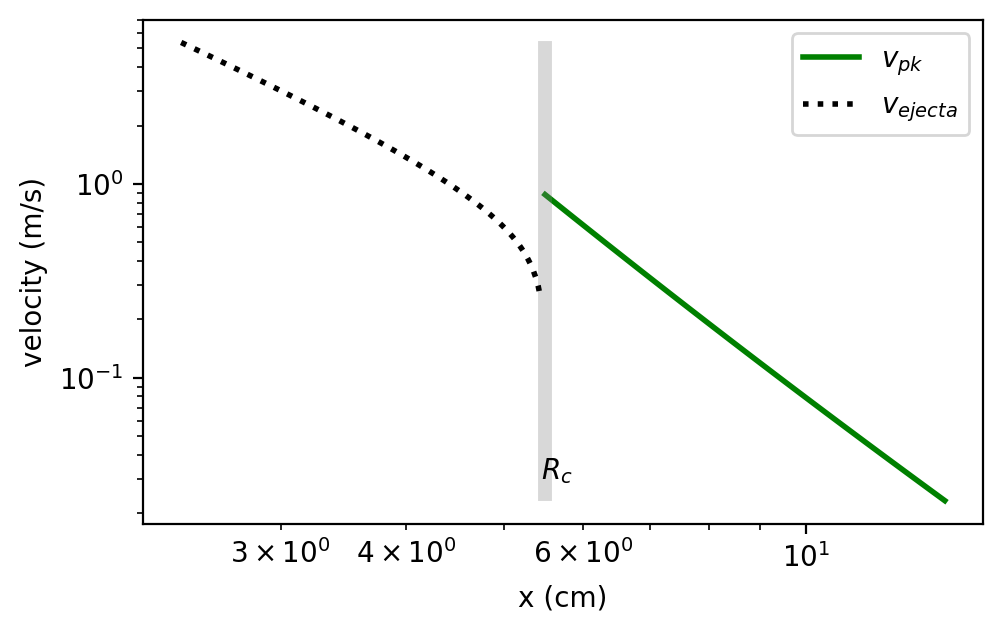

In [3]:

#The power law fits to peak velocities are 
v_rpk = 0.52  #m/s at x = R_c
beta_r = -3.55  # index 
v_zpk = 0.71 
beta_z = -4.49  #index 
R_c = 0.055  #in m,  our crater radius 
xlin = np.linspace(R_c,2.5*R_c,100)  # for displaying our displacement peak velocity 
vr = v_rpk * (xlin/R_c)**beta_r  
vz = v_zpk * (xlin/R_c)**beta_z
vtot = np.sqrt(vr**2 + vz**2)  # total velocity from power law fit

U= 5.88 # m/s our impact velocity
R_p = 19.9 /1e3 # the radius of of our projectile in m 

mu = 0.45  # taking column C6 from Table 3 by Housen+11
p = 0.3
nu = 0.4
C_1 =1.0 
pi_4 = 0.58 # rho_s/rho_p this is equal to rho/delta? yes , this is our value for our exp

xlow = 1.2*R_p
xhigh = R_c

xlin_HH = np.linspace(xlow,0.99*R_c,100)  # for displaying ejecta velocity 

# compute the above equation for the ejecta velocity 
def HH(x):
    v_ejecta = U* (x/R_p *pi_4**nu  ) **(-1/mu) * (1.0 - x/R_c)**p
    return v_ejecta
    
v_ejecta  = HH(xlin_HH)   # compute the ejecta velocity 


# make Figure 12 
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=200,facecolor='white')
plt.subplots_adjust(bottom=0.15,top=0.99,right=0.99,left=0.15)
ax.set_xlabel('x (cm)')
ax.set_ylabel('velocity (m/s)')
ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(xlin*100,vtot,'g-',label=r'$v_{pk}$',lw=2)  # this is power law fit for total velocity
ax.plot([R_c*100,R_c*100],[0.025,5],'-',color='grey',alpha=0.3,lw=5)
ax.text(R_c*99,0.03,r'$R_c$')

ax.plot(xlin_HH*100,v_ejecta,'k:',label=r'$v_{ejecta}$',lw=2)
ax.legend()
plt.savefig('HH.png',dpi=300)

print('-1/mu + p = {:.2f}'.format(-1/mu + p))